# Install pycaret🚀

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


# Load Data

In [ ]:
from pycaret.classification import *
from google.colab import drive
import pandas as pd
import zipfile
import shutil
import os
drive.mount('/content/drive')

ROOT_DIR        = '/content'  
GDRIVE_HOME     = '/content/drive/MyDrive'
DATA_ROOT_DIR   = os.path.join(ROOT_DIR, 'data')
KAGGLE_ROOT_DIR = os.path.join(GDRIVE_HOME, 'Git/study/Kaggle/TPS_Aug_2022')
KAGGLE_DATA_DIR = os.path.join(KAGGLE_ROOT_DIR, 'Data')
with zipfile.ZipFile(os.path.join(KAGGLE_DATA_DIR, 'tabular-playground-series-aug-2022.zip')) as f:
  f.extractall(DATA_ROOT_DIR)
  print('Zip extraction complete')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Zip extraction complete


In [ ]:
train_df = pd.read_csv(os.path.join(DATA_ROOT_DIR,'train.csv')).set_index('id')
test_df = pd.read_csv(os.path.join(DATA_ROOT_DIR,'test.csv')).set_index('id')
submission_df = pd.read_csv(os.path.join(DATA_ROOT_DIR,'sample_submission.csv'))

In [ ]:
train_df.columns

Index(['product_code', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17', 'failure'],
      dtype='object')

In [ ]:
cat_col = ['product_code', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']

In [ ]:
setup(data = train_df, target = 'failure', session_id = 42,
            normalize = True,
            categorical_features = cat_col, train_size=0.8,
            fix_imbalance=True)
print('Done')

,Description,Value
0,session_id,42
1,Target,failure
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26570, 25)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['product_code',
                                                            'attribute_0',
                                                            'attribute_1',
                                                            'attribute_2',
                                                            'attribute_3',
                                                            'measurement_0',
                                                            'measurement_1',
                                                            'measurement_2'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                

Done


In [ ]:
top3 = compare_models(n_select=3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7840,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.488
gbc,Gradient Boosting Classifier,0.7834,0.5702,0.0020,0.2679,0.0039,0.0011,0.0074,22.555
lightgbm,Light Gradient Boosting Machine,0.7831,0.5646,0.0041,0.3005,0.0081,0.0030,0.0125,4.463
rf,Random Forest Classifier,0.7830,0.5473,0.0011,0.1367,0.0022,-0.0007,-0.0059,12.798
et,Extra Trees Classifier,0.7825,0.5383,0.0085,0.3716,0.0166,0.0066,0.0258,10.628
ada,Ada Boost Classifier,0.7749,0.5405,0.0185,0.1770,0.0322,0.0028,0.0065,6.985
dt,Decision Tree Classifier,0.6449,0.5079,0.2668,0.2268,0.2451,0.0150,0.0151,4.338
ridge,Ridge Classifier,0.5806,0.0000,0.5116,0.2602,0.3449,0.0821,0.0925,3.285
lda,Linear Discriminant Analysis,0.5806,0.5775,0.5111,0.2601,0.3447,0.0820,0.0923,3.982
lr,Logistic Regression,0.5798,0.5778,0.5129,0.2600,0.3450,0.0820,0.0924,9.430


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[DummyClassifier(constant=None, random_state=42, strategy='prior'), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lea

In [ ]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6522,0.5165,0.2775,0.2383,0.2564,0.0311,0.0313
1,0.6533,0.5133,0.2669,0.2342,0.2495,0.0253,0.0254
2,0.6396,0.4967,0.2451,0.2115,0.2270,-0.0063,-0.0063
3,0.6309,0.4907,0.2440,0.2038,0.2221,-0.0173,-0.0174
4,0.6415,0.5022,0.2568,0.2191,0.2365,0.0041,0.0042
Mean,0.6435,0.5039,0.2581,0.2214,0.2383,0.0074,0.0074
Std,0.0083,0.0097,0.0128,0.0131,0.0130,0.0184,0.0185


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rf = create_model('rf', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.78,0.55,0.0,0.00,0.0,-0.0,-0.02
1,0.78,0.57,0.0,0.00,0.0,-0.0,-0.02
2,0.78,0.55,0.0,0.00,0.0,-0.0,-0.02
3,0.78,0.56,0.0,0.20,0.0,-0.0,-0.00
4,0.78,0.56,0.0,0.00,0.0,-0.0,-0.02
5,0.78,0.55,0.0,0.17,0.0,-0.0,-0.01
6,0.78,0.53,0.0,0.00,0.0,-0.0,-0.01
7,0.78,0.51,0.0,0.50,0.0,0.0,0.02
8,0.78,0.56,0.0,0.25,0.0,0.0,0.00


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4125,0.5395,0.7320,0.2298,0.3498,0.0316,0.0502
1,0.4337,0.5603,0.7691,0.2433,0.3696,0.0619,0.0976
2,0.4092,0.5429,0.7734,0.2356,0.3611,0.0451,0.0746
3,0.4643,0.5667,0.7190,0.2463,0.3669,0.0667,0.0964
4,0.4661,0.5607,0.6696,0.2386,0.3518,0.0481,0.0671
5,0.4534,0.5573,0.7217,0.2430,0.3636,0.0590,0.0869
6,0.4701,0.5383,0.6275,0.2317,0.3384,0.0335,0.0453
7,0.4226,0.5453,0.7495,0.2363,0.3593,0.0459,0.0726
8,0.4593,0.5667,0.7364,0.2474,0.3704,0.0696,0.1025


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.01,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=120, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2159,0.5,1.0,0.2159,0.3551,0.0,0.0
1,0.2159,0.5,1.0,0.2159,0.3551,0.0,0.0
2,0.2159,0.5,1.0,0.2159,0.3551,0.0,0.0
3,0.2159,0.5,1.0,0.2159,0.3551,0.0,0.0
4,0.7836,0.5,0.0,0.0000,0.0000,0.0,0.0
5,0.2164,0.5,1.0,0.2164,0.3558,0.0,0.0
6,0.7840,0.5,0.0,0.0000,0.0000,0.0,0.0
7,0.2160,0.5,1.0,0.2160,0.3553,0.0,0.0
8,0.2160,0.5,1.0,0.2160,0.3553,0.0,0.0


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.5,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,entropy
max_depth,4
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.01
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf2, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,entropy
max_depth,1
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.5
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6392,0.5055,0.2702,0.2230,0.2443,0.0102,0.0103
1,0.6453,0.5102,0.2723,0.2294,0.2490,0.0191,0.0192
2,0.6618,0.5215,0.2745,0.2461,0.2595,0.0412,0.0413
3,0.6458,0.5184,0.2941,0.2394,0.2639,0.0340,0.0343
4,0.6406,0.5087,0.2761,0.2276,0.2495,0.0161,0.0163
5,0.6298,0.4892,0.2413,0.2022,0.2200,-0.0202,-0.0203
6,0.6626,0.5244,0.2810,0.2500,0.2646,0.0467,0.0468
7,0.6518,0.5135,0.2702,0.2344,0.2510,0.0256,0.0257
8,0.6311,0.4893,0.2397,0.2018,0.2191,-0.0201,-0.0202


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7611,0.5109,0.0566,0.2574,0.0929,0.0162,0.0225
1,0.7611,0.5329,0.0545,0.2525,0.0896,0.0141,0.0197
2,0.7592,0.5107,0.0436,0.2151,0.0725,-0.0003,-0.0004
3,0.7582,0.5462,0.0697,0.2689,0.1107,0.0240,0.0314
4,0.7596,0.5180,0.0522,0.2424,0.0859,0.0100,0.0140
5,0.7615,0.5393,0.0717,0.2920,0.1152,0.0326,0.0435
6,0.7652,0.5083,0.0588,0.2872,0.0976,0.0261,0.0372
7,0.7576,0.5300,0.0479,0.2200,0.0787,0.0016,0.0022
8,0.7633,0.5330,0.0719,0.3000,0.1160,0.0354,0.0477


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6425,0.5068,0.2680,0.2249,0.2445,0.0127,0.0128
1,0.6439,0.5093,0.2723,0.2281,0.2483,0.0174,0.0175
2,0.6679,0.5238,0.2702,0.2505,0.2600,0.0463,0.0463
3,0.6486,0.5194,0.2919,0.2410,0.2640,0.0360,0.0363
4,0.6435,0.5144,0.2870,0.2349,0.2583,0.0267,0.0269
5,0.6359,0.4939,0.2435,0.2082,0.2244,-0.0115,-0.0116
6,0.6485,0.5091,0.2636,0.2283,0.2447,0.0172,0.0172
7,0.6433,0.5010,0.2505,0.2174,0.2328,0.0019,0.0019
8,0.6273,0.4861,0.2375,0.1978,0.2158,-0.0259,-0.0261


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7799,0.5210,0.0174,0.3200,0.0331,0.0110,0.0276
1,0.7785,0.5564,0.0022,0.0714,0.0042,-0.0087,-0.0286
2,0.7841,0.5326,0.0131,0.5000,0.0255,0.0146,0.0520
3,0.7775,0.5640,0.0174,0.2667,0.0327,0.0064,0.0148
4,0.7766,0.5376,0.0130,0.2222,0.0246,0.0007,0.0016
5,0.7799,0.5262,0.0196,0.3462,0.0370,0.0142,0.0351
6,0.7765,0.5363,0.0196,0.2647,0.0365,0.0069,0.0151
7,0.7812,0.5299,0.0218,0.3846,0.0412,0.0185,0.0456
8,0.7793,0.5404,0.0196,0.3214,0.0370,0.0124,0.0296


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [ ]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 23
INFO:logs:master_model_c

In [ ]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6463,0.5596,0.2680,0.2282,0.2465,0.0173,0.0174
1,0.6519,0.5572,0.2636,0.2314,0.2464,0.0214,0.0215
2,0.6675,0.5547,0.2745,0.2520,0.2628,0.0486,0.0487
3,0.6538,0.5791,0.2919,0.2459,0.2669,0.0425,0.0428
4,0.6458,0.5547,0.2609,0.2251,0.2417,0.0123,0.0123
5,0.6373,0.5428,0.2348,0.2049,0.2188,-0.0159,-0.0159
6,0.6687,0.5628,0.2723,0.2525,0.2621,0.0489,0.0489
7,0.6602,0.5620,0.2636,0.2396,0.2510,0.0320,0.0320
8,0.6372,0.5447,0.2353,0.2045,0.2188,-0.0159,-0.0160


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=42, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

In [ ]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7230,0.0,0.1547,0.2610,0.1943,0.0400,0.0420
1,0.7319,0.0,0.1765,0.2967,0.2213,0.0718,0.0754
2,0.7333,0.0,0.1743,0.2985,0.2201,0.0724,0.0763
3,0.7225,0.0,0.1765,0.2765,0.2154,0.0567,0.0588
4,0.7267,0.0,0.1543,0.2700,0.1964,0.0463,0.0489
5,0.7135,0.0,0.1348,0.2271,0.1692,0.0095,0.0100
6,0.7247,0.0,0.1438,0.2558,0.1841,0.0339,0.0360
7,0.7313,0.0,0.1612,0.2846,0.2058,0.0588,0.0623
8,0.7186,0.0,0.1590,0.2561,0.1962,0.0369,0.0384


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=42, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

In [ ]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7836,0.5754,0.0000,0.0000,0.0000,-0.0009,-0.0114
1,0.7836,0.5796,0.0022,0.3333,0.0043,0.0015,0.0107
2,0.7841,0.5600,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7832,0.5885,0.0000,0.0000,0.0000,-0.0019,-0.0161
4,0.7841,0.5727,0.0043,0.6667,0.0086,0.0059,0.0411
5,0.7841,0.5826,0.0022,1.0000,0.0043,0.0034,0.0413
6,0.7845,0.5566,0.0022,1.0000,0.0043,0.0034,0.0413
7,0.7840,0.5675,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7840,0.5865,0.0022,0.5000,0.0043,0.0025,0.0212


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('dummy',
                              DummyClassifier(constant=None, random_state=42,
                                              strategy='prior')),
                             ('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impuri

In [ ]:
print(blender_top3.estimators_)

[DummyClassifier(constant=None, random_state=42, strategy='prior'), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
    

In [ ]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7752,0.5818,0.0153,0.2121,0.0285,-0.0005,-0.0012
1,0.7808,0.5862,0.0283,0.3939,0.0528,0.0246,0.0543
2,0.7775,0.5627,0.0196,0.2812,0.0367,0.0088,0.0196
3,0.7789,0.5951,0.0153,0.2800,0.0289,0.0068,0.0170
4,0.7822,0.5743,0.0239,0.4400,0.0454,0.0236,0.0592
5,0.7799,0.5788,0.0196,0.3462,0.0370,0.0142,0.0351
6,0.7779,0.5597,0.0218,0.3030,0.0407,0.0120,0.0266
7,0.7774,0.5754,0.0109,0.2083,0.0207,-0.0008,-0.0020
8,0.7755,0.5842,0.0087,0.1538,0.0165,-0.0068,-0.0168


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('dummy',
                                DummyClassifier(constant=None, random_state=42,
                                                strategy='prior')),
                               ('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                  

In [ ]:
xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=xgboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


ValueError: ignored

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7832,0.5536,0.0000,0.0000,0.0000,-0.0019,-0.0161
1,0.7832,0.5654,0.0000,0.0000,0.0000,-0.0019,-0.0161
2,0.7827,0.5519,0.0000,0.0000,0.0000,-0.0028,-0.0197
3,0.7827,0.5632,0.0022,0.2000,0.0043,-0.0003,-0.0019
4,0.7827,0.5636,0.0000,0.0000,0.0000,-0.0019,-0.0161
5,0.7817,0.5491,0.0022,0.1667,0.0043,-0.0013,-0.0064
6,0.7835,0.5336,0.0000,0.0000,0.0000,-0.0009,-0.0114
7,0.7840,0.5131,0.0022,0.5000,0.0043,0.0025,0.0212
8,0.7831,0.5589,0.0022,0.2500,0.0043,0.0006,0.0036


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7841,0.5578,0.0022,0.5000,0.0043,0.0025,0.0212
1,0.7846,0.5523,0.0044,0.6667,0.0087,0.0059,0.0412
2,0.7832,0.5357,0.0000,0.0000,0.0000,-0.0019,-0.0161
3,0.7846,0.5387,0.0044,0.6667,0.0087,0.0059,0.0412
4,0.7832,0.5437,0.0000,0.0000,0.0000,-0.0009,-0.0114
5,0.7841,0.5429,0.0065,0.6000,0.0129,0.0083,0.0452
6,0.7835,0.5540,0.0022,0.3333,0.0043,0.0015,0.0107
7,0.7840,0.5429,0.0044,0.5000,0.0086,0.0049,0.0300
8,0.7831,0.5469,0.0022,0.2500,0.0043,0.0006,0.0036


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

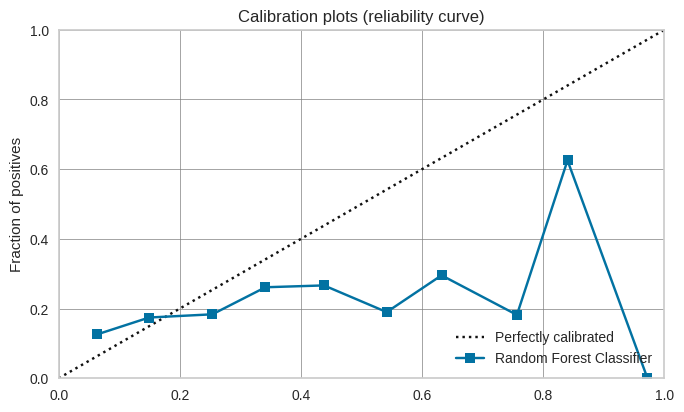

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(calibrated_rf, plot='calibration')

In [ ]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7841,0.5571,0.0022,0.5000,0.0043,0.0025,0.0212
1,0.7846,0.5509,0.0044,0.6667,0.0087,0.0059,0.0412
2,0.7832,0.5354,0.0000,0.0000,0.0000,-0.0019,-0.0161
3,0.7850,0.5352,0.0065,0.7500,0.0130,0.0093,0.0564
4,0.7827,0.5450,0.0000,0.0000,0.0000,-0.0019,-0.0161
5,0.7836,0.5400,0.0043,0.5000,0.0086,0.0049,0.0299
6,0.7831,0.5530,0.0022,0.2500,0.0043,0.0006,0.0036
7,0.7840,0.5431,0.0044,0.5000,0.0086,0.0049,0.0300
8,0.7835,0.5482,0.0044,0.4000,0.0086,0.0040,0.0217


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

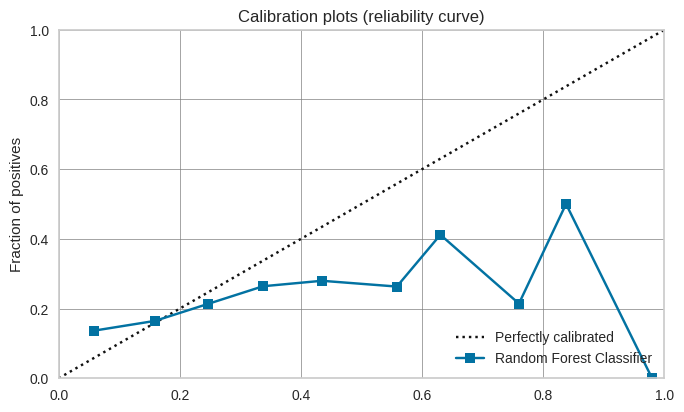

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [ ]:
predict_df = predict_model(calibrated_rf_isotonic, test_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                        

In [ ]:
last = predict_df[['Label','Score']]

In [ ]:
last

,Label,Score
id,,
26570,0,0.6992
26571,0,0.7446
26572,0,0.7533
26573,0,0.7675
26574,0,0.6104
...,...,...
47340,0,0.6320
47341,0,0.9034
47342,0,0.9100


In [ ]:
pd.merge(submission_df.id, pd.DataFrame(last.apply(lambda x: x.Score if x.Label == 1 else 1 - x.Score, axis=1)).reset_index().rename(columns={0:'failure'})).to_csv('pred.csv', index=False)

In [ ]:
pd.DataFrame(last.apply(lambda x: x.Score if x.Label == 1 else 1 - x.Score, axis=1)).reset_index()

,id,0
0,26570,0.3008
1,26571,0.2554
2,26572,0.2467
3,26573,0.2325
4,26574,0.3896
...,...,...
20770,47340,0.3680
20771,47341,0.0966
20772,47342,0.0900
20773,47343,0.2258
